# Features Transformations


In [1]:
# Importing packages we will be using
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
%store -r df quantitative_features NUM_ROWS NUM_COLS


Feature transformations refer to the process of modifying or manipulating the features (variables) in a dataset to improve their representation, extract meaningful information, or meet certain assumptions required by a particular analysis or model.

Feature transformations can take various forms depending on the nature of the data and the objectives of the analysis. Here are a few common types of feature transformations:

- Scaling/Normalization
- Logarithmic Transformation
- Square Root Transformation
- Power Transformations


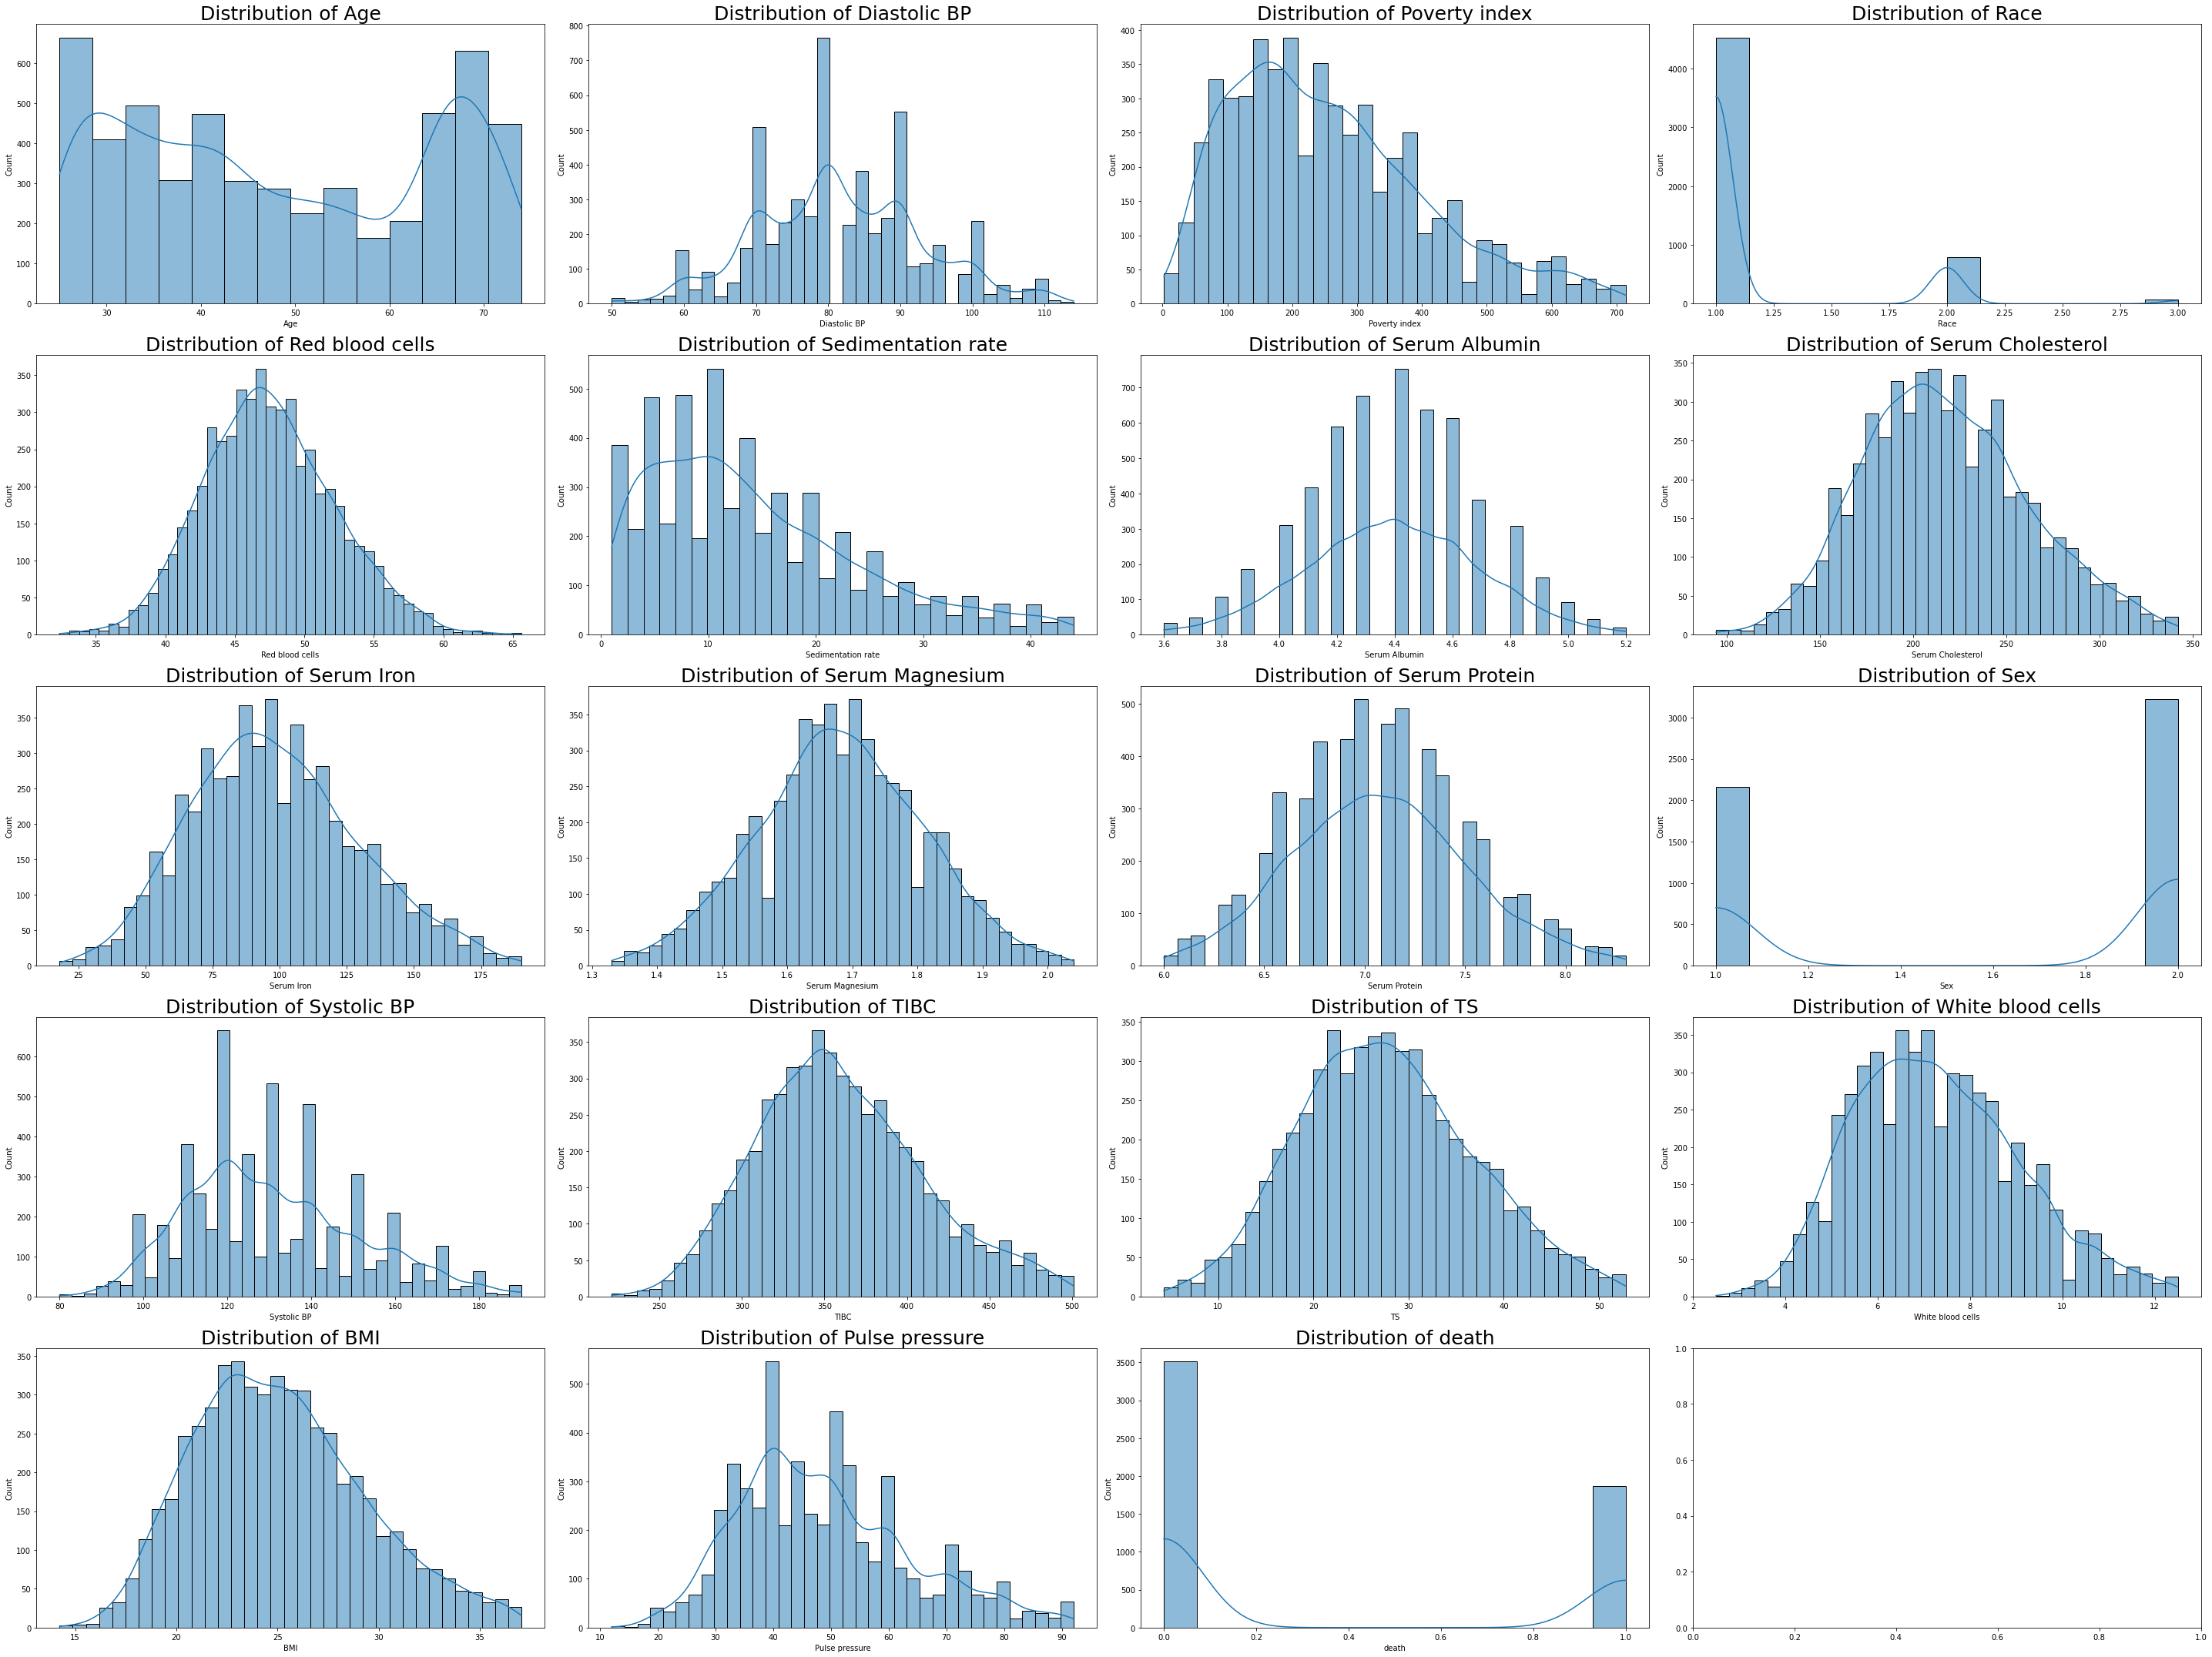

In [2]:
# Let's visualize our features distribution
def plot_dist(row, col, data, Transform=[]):
    fig, ax = plt.subplots(row, col, figsize=(40, 30))
    for i, feature in enumerate(data.columns):
        row = i // NUM_ROWS
        col = i % NUM_COLS
        if len(Transform) == 0:
            sns.histplot(data[feature], kde=True, ax=ax[row, col])
        else:
            sns.histplot(data[feature].agg(Transform),
                         kde=True, ax=ax[row, col])

        ax[row, col].set_title(f"Distribution of {feature}", fontsize="25")

    fig.tight_layout()
    plt.show()


# First, we will visualize the features distribution without any transformations
plot_dist(5, 4, df)


From the previous distributions we notice the following:

- Age, Diastolic Bp, Systolic Bp, Pulse Pressure: Distribution type is unknown.
- Poverty Index, White Blood Cells, BMI: These variables appear to have a right-skewed normal distribution.
- Sex, Race: These are categorical features.
- The remaining variables appear to follow a normal distribution, but further verification will be conducted later.


## Square Root & Logarithmic Transformations


**Square Root Transformation**
The square root transformation involves taking the square root of each value in a dataset. Mathematically, for a variable $Y$, the square root transformation is represented as $Y_{\text{sqrt}} = \sqrt{Y}$.  
The square root transformation is often used to address positive skewness in data or to stabilize the variance. By taking the square root of the values, it compresses larger values and spreads out smaller values, resulting in a more symmetrical distribution. This transformation is particularly useful when the relationship between the variable and the target is approximately proportional or when the variable has a right-skewed distribution.

**Logarthmic Logarithmic (Log) Transformation**
The logarithmic transformation involves taking the logarithm of each value in a dataset. The most common logarithmic bases used are the natural logarithm (base $e$) and the common logarithm (base $10$). Mathematically, for a variable $Y$, the logarithmic transformation is represented as $Y_{\text{log}} = \log(Y)$.  
The log transformation is often used to handle positive skewness or to compress the range of values. It is particularly helpful when dealing with data that spans several orders of magnitude or when the relationship between the variable and the target is multiplicative. By taking the logarithm, the data is transformed into a more symmetrical distribution, which can make it easier to analyze and model. It can also help linearize the relationship between variables that exhibit exponential or power-law relationships.


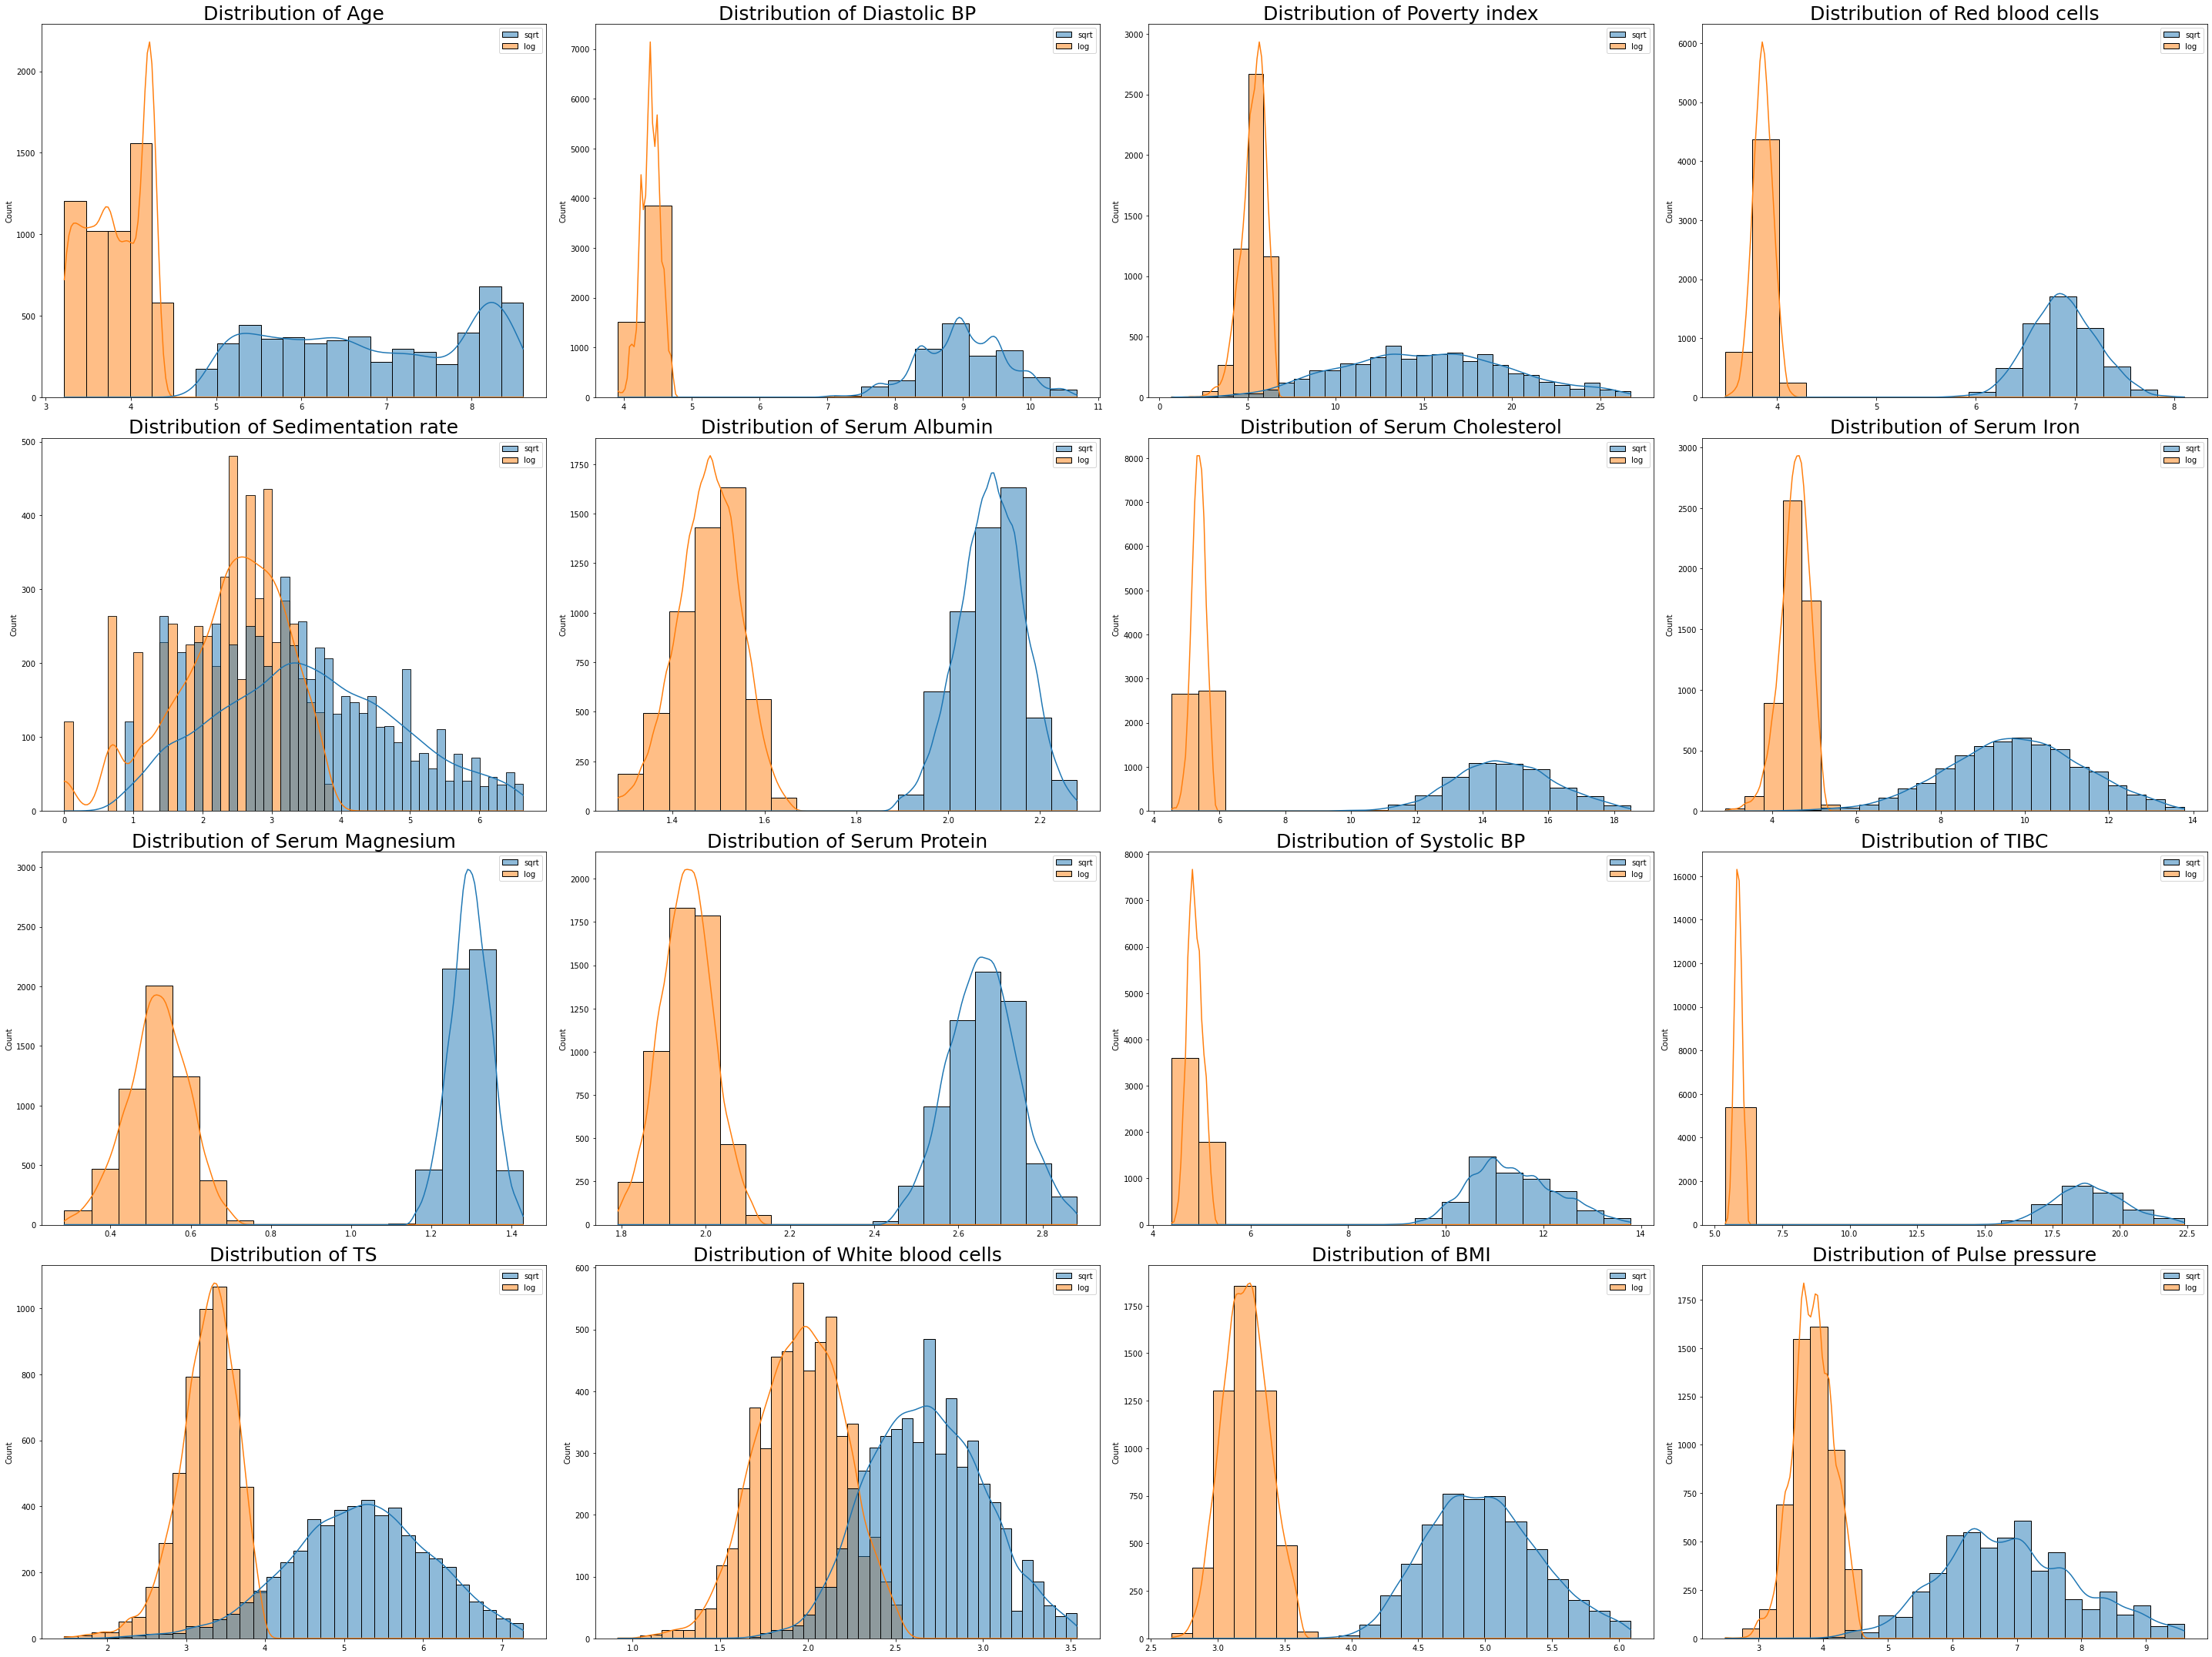

In [3]:
# Let's visualize the square root transformation vs logarithmic transformation
plot_dist(4, 4, df[quantitative_features], Transform=["sqrt", "log"])


## Box-Cox Transformation

The Box-Cox transformation is defined by the following formula:

$$
Y(\lambda) =
\begin{cases}
\frac{{Y^\lambda - 1}}{{\lambda}}, & \text{if } \lambda \neq 0 \\
\log(Y), & \text{if } \lambda = 0 \\
\end{cases}
$$

In this formula, $Y$ represents the original variable, and $\lambda$ is the transformation parameter.
The parameter \lambda determines the type and strength of the transformation as following:

- When $\lambda = 0$: The natural logarithm transformation ($log(Y)$) is applied.
- When $\lambda = 1$: No transformation is applied, and the variable remains unchanged.
- When $\lambda > 0$: Positive values of $\lambda$ indicate a power transformation, where larger values result in stronger transformations. A value of $\lambda$ close to $1$ indicates a mild transformation, while larger values deviate further from the identity transformation.
- When $\lambda < 0$: Negative values of $\lambda$ indicate a reciprocal transformation.
  The goal of the Box-Cox transformation is to find the optimal $\lambda$ value that maximizes the normality of the transformed variable. This is typically achieved by maximizing the log-likelihood function.


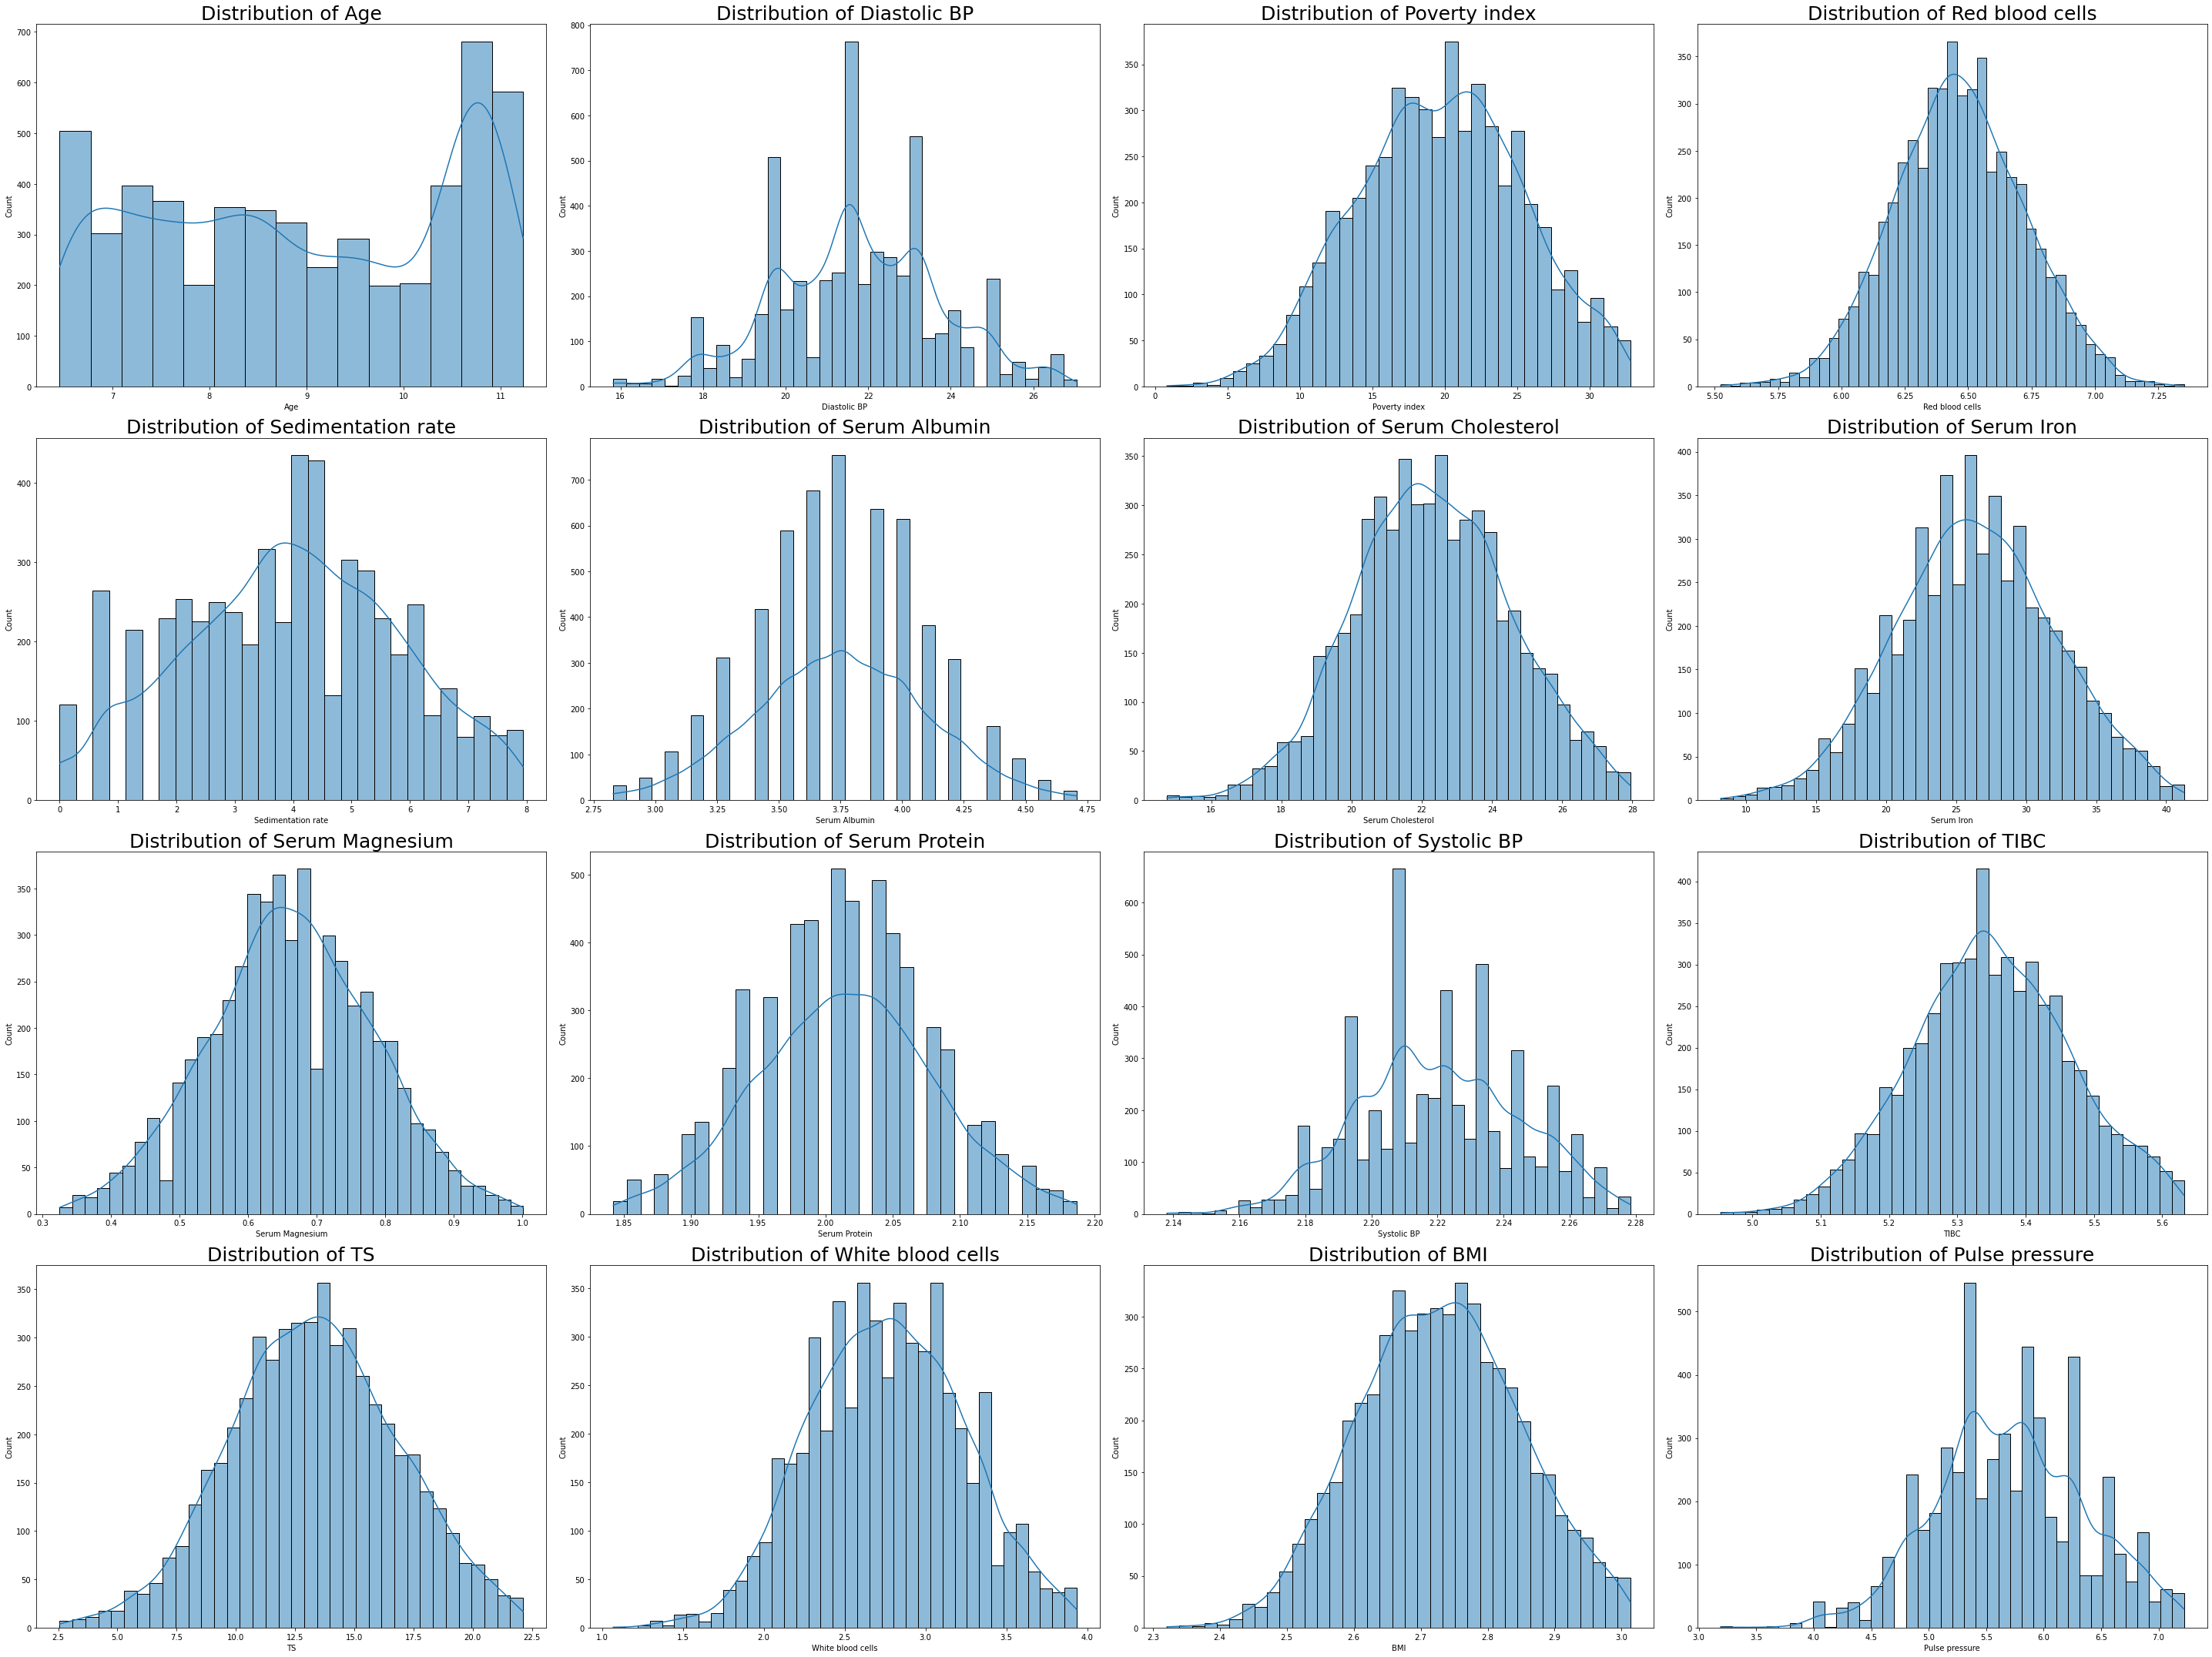

In [4]:
# First, we define our Box-Cox transformation function
def boxcox_transform(data):
    trans, _ = boxcox(data)
    return trans


# Let's copy our original DF, and apply Box-Cox transformation to the new DF
boxcox_df = df.copy(deep=True)
for feature in quantitative_features:
    boxcox_feature = boxcox_transform(df[feature])
    boxcox_df[feature] = boxcox_feature

# Take a look at the quantitative features distributions of the Box-Cox transformed data
plot_dist(4, 4, boxcox_df[quantitative_features])


The Box-Cox Transformation has yielded a satisfactory visual approximation of a normal distribution, affirming its effectiveness. Therefore, we will proceed with utilizing the transformed features.


In [5]:
%store boxcox_df

Stored 'boxcox_df' (DataFrame)
